<h1>Table of Contents<span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item"><li><span><a href="#EMAs" data-toc-modified-id="EMAs-1"><span class="toc-item-num">1&nbsp;&nbsp;</span>EMAs</a></span></li><li><span><a href="#5min-from-1min" data-toc-modified-id="5min-from-1min-2"><span class="toc-item-num">2&nbsp;&nbsp;</span>5min from 1min</a></span></li><li><span><a href="#Aroon" data-toc-modified-id="Aroon-3"><span class="toc-item-num">3&nbsp;&nbsp;</span>Aroon</a></span></li><li><span><a href="#RSI" data-toc-modified-id="RSI-4"><span class="toc-item-num">4&nbsp;&nbsp;</span>RSI</a></span></li><li><span><a href="#MACD" data-toc-modified-id="MACD-5"><span class="toc-item-num">5&nbsp;&nbsp;</span>MACD</a></span></li><li><span><a href="#Ichimoku" data-toc-modified-id="Ichimoku-6"><span class="toc-item-num">6&nbsp;&nbsp;</span>Ichimoku</a></span></li><li><span><a href="#ATR" data-toc-modified-id="ATR-7"><span class="toc-item-num">7&nbsp;&nbsp;</span>ATR</a></span></li><li><span><a href="#Combined" data-toc-modified-id="Combined-8"><span class="toc-item-num">8&nbsp;&nbsp;</span>Combined</a></span></li></ul></div>

In [38]:
import pandas as pd
import pandas_ta as ta



For the EMA, lets collect the 9, 20, 50, 100 and 200
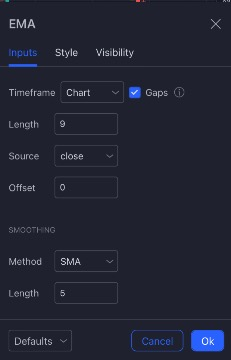

For the, we want Aroon Up and Aroon Down
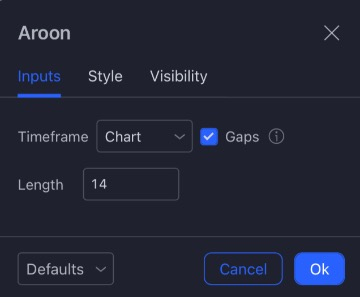

For RSI, we want the RSI value
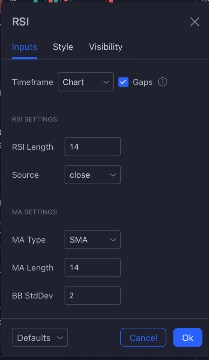





## EMAs

In [39]:
df = pd.read_csv("bars_1m.csv",parse_dates=["stamp"])
df

,stamp,symbol,open,high,low,close,volume
0,2022-06-06 04:00:00,AAPL,146.19,147.7200,146.1900,147.490,6143
1,2022-06-06 04:00:00,AMD,107.55,108.0900,107.4800,108.070,2829
2,2022-06-06 04:00:00,DIS,109.59,109.5900,109.5900,109.590,324
3,2022-06-06 04:00:00,KO,63.63,63.6300,63.6300,63.630,485
4,2022-06-06 04:00:00,LUV,44.00,44.0000,44.0000,44.000,104
...,...,...,...,...,...,...,...
12809,2022-06-08 10:06:00,LUV,44.36,44.3800,44.3305,44.380,2521
12810,2022-06-08 10:06:00,MCD,247.06,247.0600,247.0600,247.060,974
12811,2022-06-08 10:06:00,NKE,123.51,123.6200,123.4300,123.570,13044
12812,2022-06-08 10:06:00,SNOW,134.90,135.3300,134.8200,135.043,10858


In [2]:
df.symbol.unique()

array(['AAPL'], dtype=object)

## 5min from 1min

In [7]:
df.set_index(pd.DatetimeIndex(df["stamp"]), inplace=True)

In [156]:
ema_strategy = ta.Strategy(
    name="EMA Strategy",
    description="EMA 9,20, 50, 100, 200",
    ta=[
        {"kind": "ema", "length": 9},
        {"kind": "ema", "length": 20},
        {"kind": "ema", "length": 50},
        {"kind": "ema", "length": 100},
        {"kind": "ema", "length": 200},
#         {"kind":"macd"},
#         {"kind":"atr"},
#         {"kind":"aroon"},
#         {"kind":"rsi"},
#         {"kind":"ichimoku"}
    ]
)

def apply_strat(x):
    x.ta.strategy(ema_strategy)
    return x

newdf = df.groupby(['symbol']).apply(apply_strat)
newdf

,symbol,open,high,low,close,volume,EMA_9,EMA_20,EMA_50,EMA_100,EMA_200
stamp,,,,,,,,,,,
2022-05-16 04:00:00,AAPL,146.6800,146.6800,145.8600,145.860,9287,NaN,NaN,NaN,NaN,NaN
2022-05-16 04:00:00,AMD,94.4900,94.5600,93.5600,94.130,2882,NaN,NaN,NaN,NaN,NaN
2022-05-16 04:00:00,BA,126.9500,126.9500,126.9500,126.950,574,NaN,NaN,NaN,NaN,NaN
2022-05-16 04:00:00,KO,65.8400,65.8400,65.8400,65.840,504,NaN,NaN,NaN,NaN,NaN
2022-05-16 04:00:00,TSLA,765.0000,769.9700,760.0500,760.060,4767,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...
2022-05-17 10:08:00,LUV,44.7015,44.7263,44.6900,44.710,4492,44.719865,44.675440,44.481097,44.196004,43.910007
2022-05-17 10:08:00,MCD,243.1300,243.4920,243.0311,243.492,3498,243.350834,243.490397,243.860548,244.060371,244.062177
2022-05-17 10:08:00,NKE,115.2000,115.2374,115.1500,115.150,9601,115.241670,115.353398,115.204100,114.620742,113.924883


In [157]:
newdf.columns

Index(['symbol', 'open', 'high', 'low', 'close', 'volume', 'EMA_9', 'EMA_20',
       'EMA_50', 'EMA_100', 'EMA_200'],
      dtype='object')

## Aroon

In [16]:
def apply_strat(x):
#     x.ta.aroon()
    return x.ta.aroon()

newdf = df.groupby(['symbol']).apply(apply_strat).reset_index()
newdf["symbol"]=df.symbol.tolist()
# newdf["stamp"]=df.stamp
newdf

,stamp,AROOND_14,AROONU_14,AROONOSC_14,symbol
0,2022-05-16 04:00:00,NaN,NaN,NaN,AAPL
1,2022-05-16 04:00:00,NaN,NaN,NaN,AAPL
2,2022-05-16 04:00:00,NaN,NaN,NaN,AAPL
3,2022-05-16 04:00:00,NaN,NaN,NaN,AAPL
4,2022-05-16 04:00:00,NaN,NaN,NaN,AAPL
...,...,...,...,...,...
7712,2022-05-17 10:08:00,7.142857,35.714286,28.571429,NKE
7713,2022-05-17 10:08:00,92.857143,21.428571,-71.428571,SNOW
7714,2022-05-17 10:08:00,92.857143,14.285714,-78.571429,SNOW
7715,2022-05-17 10:08:00,100.000000,14.285714,-85.714286,TSLA


## RSI

In [17]:
def apply_strat(x):
#     x.ta.aroon()
    return x.ta.rsi()

newdf = pd.DataFrame(df.groupby(['symbol']).apply(apply_strat)).reset_index()
# newdf["symbol"]=df.symbol
# newdf["stamp"]=df.stamp
newdf


,symbol,stamp,RSI_14
0,AAPL,2022-05-16 04:00:00,NaN
1,AAPL,2022-05-16 04:01:00,NaN
2,AAPL,2022-05-16 04:03:00,NaN
3,AAPL,2022-05-16 04:04:00,NaN
4,AAPL,2022-05-16 04:05:00,NaN
...,...,...,...
7712,TSLA,2022-05-17 10:04:00,53.851908
7713,TSLA,2022-05-17 10:05:00,51.221620
7714,TSLA,2022-05-17 10:06:00,48.754983
7715,TSLA,2022-05-17 10:07:00,43.919427


## MACD
For MACD we want the Fast, Slow and histogram. For the histogram we need to track when it is above the 0 and goes up it is Dark Green, when it is above 0 and goes down it is Light Green, when it is below 0 and goes down it is Dark Red and when it is below 0 and goes up it is Light Red. We will track the cross and if it is above or below the histogram.
![image.png](macd.jpeg)

In [18]:
def apply_strat(x):
#     x.ta.aroon()
    return x.ta.macd()

newdf = df.groupby(['symbol']).apply(lambda x: x.ta.macd()).reset_index()
# newdf["symbol"]=df.symbol
# newdf["stamp"]=df.stamp
newdf


,symbol,stamp,MACD_12_26_9,MACDh_12_26_9,MACDs_12_26_9
0,AAPL,2022-05-16 04:00:00,NaN,NaN,NaN
1,AAPL,2022-05-16 04:01:00,NaN,NaN,NaN
2,AAPL,2022-05-16 04:03:00,NaN,NaN,NaN
3,AAPL,2022-05-16 04:04:00,NaN,NaN,NaN
4,AAPL,2022-05-16 04:05:00,NaN,NaN,NaN
...,...,...,...,...,...
7712,TSLA,2022-05-17 10:04:00,0.087612,-0.071941,0.159553
7713,TSLA,2022-05-17 10:05:00,0.124145,-0.028326,0.152471
7714,TSLA,2022-05-17 10:06:00,0.050841,-0.081305,0.132145
7715,TSLA,2022-05-17 10:07:00,-0.220561,-0.282165,0.061604


## Ichimoku
For the Ichimoku Cloud we will get the Conversion Line, the Baseline, Leading Span 1 and Leading Span 2. The indicator may also provide future Leading Span 1 and 2 and Lagging. Lets get those too.

![image-3.png](ichi.jpeg)

* Tenkan-sen (Conversion Line) => its
* Kijun-sen (Base Line) => iks
* Senkou Span A (Leading Span A)
* Senkou Span B (Leading Span B)

* ret (),(span a, spanb)

In [45]:
def ich1(x):
    return x.ta.ichimoku()[0]
def ich2(x):
    return x.ta.ichimoku()[1]

res = df.groupby(['symbol']).apply(ich1)
res["symbol"]=df.symbol.tolist()
res = res.reset_index()
# res.columns = ["stamp", ""]
# res2 = df.groupby(['symbol']).apply(ich2).reset_index()
# res2["stamp"]=res2["level_1"]
# del res2["level_1"]
res


,stamp,ISA_9,ISB_26,ITS_9,IKS_26,ICS_26,symbol
0,2022-05-16 04:00:00,NaN,NaN,NaN,NaN,146.05,AAPL
1,2022-05-16 04:00:00,NaN,NaN,NaN,NaN,94.73,AAPL
2,2022-05-16 04:00:00,NaN,NaN,NaN,NaN,127.10,AAPL
3,2022-05-16 04:00:00,NaN,NaN,NaN,NaN,65.85,AAPL
4,2022-05-16 04:00:00,NaN,NaN,NaN,NaN,767.94,AAPL
...,...,...,...,...,...,...,...
7712,2022-05-17 10:08:00,44.4875,44.00,44.7000,44.63500,NaN,NKE
7713,2022-05-17 10:08:00,245.1225,245.52,243.3075,243.39250,NaN,SNOW
7714,2022-05-17 10:08:00,115.5300,114.60,115.2675,115.61750,NaN,SNOW
7715,2022-05-17 10:08:00,151.4657,151.09,144.1150,147.35500,NaN,TSLA


In [46]:
# res.query("symbol=='AAPL'").sort_values("stamp", ascending=False).to_csv("ichfirst.csv")

In [47]:
# # res["shifted_ICS_26"]=res.groupby("symbol").ICS_26.shift()
# res["ICS_26"] = res.groupby("symbol").ICS_26.shift()
# res["ISA_9"]=res.groupby("symbol").ISA_9.shift(-1)
# res["ISB_26"]=res.groupby("symbol").ISB_26.shift(-1)
# res

In [48]:
res.query("symbol=='AAPL'").sort_values("stamp", ascending=False).to_csv("ich_1m_ud.csv", index=False)
res2.query("symbol=='AAPL'").sort_values("stamp", ascending=False).to_csv("ich_1m_fut.csv", index=False)
# res2

In [49]:
pd.concat([res,res2]).reset_index()

,index,stamp,ISA_9,ISB_26,ITS_9,IKS_26,ICS_26,symbol
0,0,2022-05-16 04:00:00,NaN,NaN,NaN,NaN,146.05,AAPL
1,1,2022-05-16 04:00:00,NaN,NaN,NaN,NaN,94.73,AAPL
2,2,2022-05-16 04:00:00,NaN,NaN,NaN,NaN,127.10,AAPL
3,3,2022-05-16 04:00:00,NaN,NaN,NaN,NaN,65.85,AAPL
4,4,2022-05-16 04:00:00,NaN,NaN,NaN,NaN,767.94,AAPL
...,...,...,...,...,...,...,...,...
7998,281,2022-06-16 10:08:00,750.662475,750.935,NaN,NaN,NaN,TSLA
7999,282,2022-06-17 10:08:00,750.467500,750.935,NaN,NaN,NaN,TSLA
8000,283,2022-06-20 10:08:00,750.335000,750.935,NaN,NaN,NaN,TSLA
8001,284,2022-06-21 10:08:00,750.022500,750.935,NaN,NaN,NaN,TSLA


In [50]:
res.query("symbol=='AAPL'").sort_values("stamp", ascending=False) #.stamp.value_counts()

,stamp,ISA_9,ISB_26,ITS_9,IKS_26,ICS_26,symbol
7696,2022-05-17 10:07:00,98.810,98.750,99.28005,99.38000,NaN,AAPL
7695,2022-05-17 10:07:00,148.690,148.495,147.85030,148.25025,NaN,AAPL
7674,2022-05-17 10:05:00,98.215,98.155,99.28005,99.38000,NaN,AAPL
7673,2022-05-17 10:05:00,148.690,148.495,147.97500,148.37495,NaN,AAPL
7662,2022-05-17 10:04:00,148.690,148.495,147.97500,148.37495,NaN,AAPL
...,...,...,...,...,...,...,...
3,2022-05-16 04:00:00,NaN,NaN,NaN,NaN,65.85,AAPL
2,2022-05-16 04:00:00,NaN,NaN,NaN,NaN,127.10,AAPL
1,2022-05-16 04:00:00,NaN,NaN,NaN,NaN,94.73,AAPL
4,2022-05-16 04:00:00,NaN,NaN,NaN,NaN,767.94,AAPL


In [42]:
df.drop("stamp", axis=1).reset_index().query("symbol=='AAPL'").sort_values("stamp", ascending=False).stamp.value_counts()

2022-05-16 15:39:00    1
2022-05-16 14:07:00    1
2022-05-17 09:41:00    1
2022-05-16 14:08:00    1
2022-05-16 19:01:00    1
                      ..
2022-05-16 12:34:00    1
2022-05-17 08:07:00    1
2022-05-16 08:29:00    1
2022-05-16 17:28:00    1
2022-05-16 10:45:00    1
Name: stamp, Length: 1115, dtype: int64

In [51]:
from finta import TA


In [52]:
def ich1(x):
    return TA.ICHIMOKU(x)

newdf=df.groupby(["symbol"]).apply(ich1).reset_index()
# newdf.columns = ["symbol", "stamp", "conversion", "base", "leading_span_a","leading_span_b", "chikou"]
newdf

,symbol,stamp,TENKAN,KIJUN,senkou_span_a,SENKOU,CHIKOU
0,AAPL,2022-05-16 04:00:00,NaN,NaN,NaN,NaN,146.05
1,AAPL,2022-05-16 04:01:00,NaN,NaN,NaN,NaN,146.11
2,AAPL,2022-05-16 04:03:00,NaN,NaN,NaN,NaN,146.35
3,AAPL,2022-05-16 04:04:00,NaN,NaN,NaN,NaN,146.45
4,AAPL,2022-05-16 04:05:00,NaN,NaN,NaN,NaN,146.53
...,...,...,...,...,...,...,...
7712,TSLA,2022-05-17 10:04:00,750.12995,751.19500,748.5450,747.0600,NaN
7713,TSLA,2022-05-17 10:05:00,749.74000,751.19500,748.5450,747.0600,NaN
7714,TSLA,2022-05-17 10:06:00,749.47500,751.19500,750.2143,748.7293,NaN
7715,TSLA,2022-05-17 10:07:00,748.85000,751.19500,750.2143,748.7293,NaN


In [53]:
newdf=df.groupby(["symbol"]).apply(lambda x: TA.ICHIMOKU(x)).reset_index()
# newdf.columns = ["symbol", "stamp", "conversion", "base", "leading_span_a","leading_span_b", "chikou"]
newdf

,symbol,stamp,TENKAN,KIJUN,senkou_span_a,SENKOU,CHIKOU
0,AAPL,2022-05-16 04:00:00,NaN,NaN,NaN,NaN,146.05
1,AAPL,2022-05-16 04:01:00,NaN,NaN,NaN,NaN,146.11
2,AAPL,2022-05-16 04:03:00,NaN,NaN,NaN,NaN,146.35
3,AAPL,2022-05-16 04:04:00,NaN,NaN,NaN,NaN,146.45
4,AAPL,2022-05-16 04:05:00,NaN,NaN,NaN,NaN,146.53
...,...,...,...,...,...,...,...
7712,TSLA,2022-05-17 10:04:00,750.12995,751.19500,748.5450,747.0600,NaN
7713,TSLA,2022-05-17 10:05:00,749.74000,751.19500,748.5450,747.0600,NaN
7714,TSLA,2022-05-17 10:06:00,749.47500,751.19500,750.2143,748.7293,NaN
7715,TSLA,2022-05-17 10:07:00,748.85000,751.19500,750.2143,748.7293,NaN


In [57]:
newdf.query("symbol=='AAPL'").sort_values("stamp",ascending=False).to_csv("isch2.csv")

In [78]:
mapping={"TENKAN": "blue",
        "KIJUN":"yellow",
        "senkou_span_a":"green",
        "SENKOU":"red",
        "CHIKOU":"white"}

In [162]:
# tndf = newdf.query("symbol=='AAPL'").copy()
# tndf["senkou_span_a"]=tndf["senkou_span_a"].shift(-1)
# tndf["SENKOU"]=tndf["SENKOU"].shift(-1)


newdf=df.groupby(["symbol"]).apply(lambda x: TA.ICHIMOKU(x[["open","high","low","close"]])).reset_index()
mapper = lambda y,x: mapping[x] if x in y else x
cols = newdf.columns

mapping={"TENKAN": "blue",
        "KIJUN":"yellow",
        "senkou_span_a":"green",
        "SENKOU":"red",
        "CHIKOU":"white"}

newdf.columns = [mapper(list(mapping.keys()), x) for x in cols]
newdf["green"] = newdf.sort_values("stamp", ascending=False).groupby("symbol")["green"].shift(1)
newdf["red"] = newdf.sort_values("stamp", ascending=False).groupby("symbol")["red"].shift(1)
# newdf["stamp"]=df.stamp.copy()

newdf.query("""symbol=='AAPL' and stamp>='2022-05-17 09:50:00' and stamp<='2022-05-17 09:59:00'""")#.sort_values("stamp",ascending=False)

,symbol,stamp,blue,yellow,green,red,white
1096,AAPL,2022-05-17 09:50:00,148.49000,148.60005,148.212500,148.01500,NaN
1097,AAPL,2022-05-17 09:51:00,148.49000,148.60005,148.212500,148.01500,NaN
1098,AAPL,2022-05-17 09:52:00,148.42005,148.60005,148.332525,148.12500,NaN
1099,AAPL,2022-05-17 09:53:00,148.37505,148.60005,148.440000,148.20500,NaN
1100,AAPL,2022-05-17 09:54:00,148.25000,148.59500,148.440000,148.20500,NaN
1101,AAPL,2022-05-17 09:55:00,148.15000,148.52500,148.540000,148.30500,NaN
1102,AAPL,2022-05-17 09:56:00,147.99500,148.52500,148.540000,148.30500,NaN
1103,AAPL,2022-05-17 09:57:00,147.99500,148.52500,148.540000,148.30505,NaN
1104,AAPL,2022-05-17 09:58:00,147.99500,148.52500,148.707500,148.47000,NaN
1105,AAPL,2022-05-17 09:59:00,147.95500,148.40000,148.707500,148.47000,NaN


,symbol,open,high,low,close,volume
stamp,,,,,,
2022-05-16 04:00:00,AAPL,146.6800,146.6800,145.86,145.860,9287
2022-05-16 04:01:00,AAPL,145.9600,146.0000,145.96,146.000,1633
2022-05-16 04:03:00,AAPL,146.0200,146.0500,146.02,146.050,932
2022-05-16 04:04:00,AAPL,146.0500,146.0500,146.05,146.050,536
2022-05-16 04:05:00,AAPL,146.0000,146.0000,145.95,145.950,1161
...,...,...,...,...,...,...
2022-05-17 10:08:00,NKE,115.2000,115.2374,115.15,115.150,9601
2022-05-17 10:07:00,SNOW,143.9100,144.1700,143.28,143.890,38812
2022-05-17 10:08:00,SNOW,143.7300,143.7300,142.53,142.650,21501


In [143]:
newdf=pd.DataFrame()
for s in df.symbol.unique():
    cdf = TA.ICHIMOKU(df.query("symbol==@s"))
    cdf["symbol"]=s
    newdf=pd.concat([newdf,cdf])
        
newdf = newdf.reset_index().sort_values("stamp")
newdf

,stamp,TENKAN,KIJUN,senkou_span_a,SENKOU,CHIKOU,symbol
0,2022-05-16 04:00:00,NaN,NaN,NaN,NaN,146.05,AAPL
6755,2022-05-16 04:00:00,NaN,NaN,NaN,NaN,767.94,TSLA
2143,2022-05-16 04:00:00,NaN,NaN,NaN,NaN,127.10,BA
4212,2022-05-16 04:00:00,NaN,NaN,NaN,NaN,65.85,KO
1115,2022-05-16 04:00:00,NaN,NaN,NaN,NaN,94.73,AMD
...,...,...,...,...,...,...,...
5669,2022-05-17 10:08:00,243.3075,243.39250,245.1225,245.520,NaN,MCD
1114,2022-05-17 10:08:00,147.8503,148.25025,148.6475,148.495,NaN,AAPL
6148,2022-05-17 10:08:00,115.2675,115.61750,115.5300,114.600,NaN,NKE
6754,2022-05-17 10:08:00,144.1150,147.35500,151.4657,151.090,NaN,SNOW


In [142]:
newdf.reset_index().sort_values("stamp")

,stamp,TENKAN,KIJUN,senkou_span_a,SENKOU,CHIKOU,symbol
0,2022-05-16 04:00:00,NaN,NaN,NaN,NaN,146.05,AAPL
6755,2022-05-16 04:00:00,NaN,NaN,NaN,NaN,767.94,TSLA
2143,2022-05-16 04:00:00,NaN,NaN,NaN,NaN,127.10,BA
4212,2022-05-16 04:00:00,NaN,NaN,NaN,NaN,65.85,KO
1115,2022-05-16 04:00:00,NaN,NaN,NaN,NaN,94.73,AMD
...,...,...,...,...,...,...,...
5669,2022-05-17 10:08:00,243.3075,243.39250,245.1225,245.520,NaN,MCD
1114,2022-05-17 10:08:00,147.8503,148.25025,148.6475,148.495,NaN,AAPL
6148,2022-05-17 10:08:00,115.2675,115.61750,115.5300,114.600,NaN,NKE
6754,2022-05-17 10:08:00,144.1150,147.35500,151.4657,151.090,NaN,SNOW


In [119]:
# del df["stamp"] 
df.reset_index()

,stamp,symbol,open,high,low,close,volume
0,2022-05-16 04:00:00,AAPL,146.6800,146.6800,145.86,145.860,9287
1,2022-05-16 04:01:00,AAPL,145.9600,146.0000,145.96,146.000,1633
2,2022-05-16 04:03:00,AAPL,146.0200,146.0500,146.02,146.050,932
3,2022-05-16 04:04:00,AAPL,146.0500,146.0500,146.05,146.050,536
4,2022-05-16 04:05:00,AAPL,146.0000,146.0000,145.95,145.950,1161
...,...,...,...,...,...,...,...
7712,2022-05-17 10:08:00,NKE,115.2000,115.2374,115.15,115.150,9601
7713,2022-05-17 10:07:00,SNOW,143.9100,144.1700,143.28,143.890,38812
7714,2022-05-17 10:08:00,SNOW,143.7300,143.7300,142.53,142.650,21501
7715,2022-05-17 10:07:00,TSLA,748.6398,749.4236,744.26,746.135,146397


In [113]:
df.index.duplicated()

array([False, False, False, ...,  True,  True,  True])

## ATR

In [154]:

res = df.groupby(['symbol']).apply(lambda x: x.ta.atr())
res.reset_index()

,symbol,stamp,ATRr_14
0,AAPL,2022-05-16 04:00:00,NaN
1,AAPL,2022-05-16 04:01:00,NaN
2,AAPL,2022-05-16 04:03:00,NaN
3,AAPL,2022-05-16 04:04:00,NaN
4,AAPL,2022-05-16 04:05:00,NaN
...,...,...,...
7712,TSLA,2022-05-17 10:04:00,3.554211
7713,TSLA,2022-05-17 10:05:00,3.525453
7714,TSLA,2022-05-17 10:06:00,3.444577
7715,TSLA,2022-05-17 10:07:00,3.567365


In [148]:
df.reset_index().set_index("stamp")

,symbol,open,high,low,close,volume
stamp,,,,,,
2022-05-16 04:00:00,AAPL,146.6800,146.6800,145.86,145.860,9287
2022-05-16 04:01:00,AAPL,145.9600,146.0000,145.96,146.000,1633
2022-05-16 04:03:00,AAPL,146.0200,146.0500,146.02,146.050,932
2022-05-16 04:04:00,AAPL,146.0500,146.0500,146.05,146.050,536
2022-05-16 04:05:00,AAPL,146.0000,146.0000,145.95,145.950,1161
...,...,...,...,...,...,...
2022-05-17 10:08:00,NKE,115.2000,115.2374,115.15,115.150,9601
2022-05-17 10:07:00,SNOW,143.9100,144.1700,143.28,143.890,38812
2022-05-17 10:08:00,SNOW,143.7300,143.7300,142.53,142.650,21501


## Combined

In [1]:
import pandas as pd
import pandas_ta as ta

In [11]:
df = pd.read_csv("bars_5m.csv",parse_dates=["stamp"])
df

,stamp,symbol,open,high,low,close,volume
0,2022-06-06 04:00:00,AAPL,146.1900,147.7200,146.1900,147.2500,17819
1,2022-06-06 04:00:00,AMD,107.5500,108.9400,107.4800,108.3300,11861
2,2022-06-06 04:00:00,DIS,109.5900,109.5900,109.5900,109.5900,324
3,2022-06-06 04:00:00,KO,63.6300,63.6300,63.1100,63.2100,989
4,2022-06-06 04:00:00,LUV,44.0000,44.0000,44.0000,44.0000,104
...,...,...,...,...,...,...,...
3277,2022-06-08 10:05:00,LUV,44.4436,44.4436,44.3602,44.3750,5114
3278,2022-06-08 10:05:00,MCD,247.0100,247.2211,247.0100,247.2211,3228
3279,2022-06-08 10:05:00,NKE,123.5300,123.5300,123.4300,123.5250,6860
3280,2022-06-08 10:05:00,SNOW,134.8300,135.0000,134.5600,134.9124,14579


In [18]:
def pta_indicators(df,ind):
    if ind=="ema":
        kind = [{"kind": "ema", "length": 9},
            {"kind": "ema", "length": 20},
            {"kind": "ema", "length": 50},
            {"kind": "ema", "length": 100},
            {"kind": "ema", "length": 200},
            {"kind": "aroon"},
           {"kind": "rsi"},
           {"kind": "macd"},
           {"kind": "ichimoku"}]
    else:
        kind = [{"kind":ind}]

    ema_strategy = ta.Strategy(
        name="Strategy",
        description="",
        ta=
            kind
        )

    def apply_strat(x):
        x.ta.strategy(ema_strategy)
        return x

    newdf = df.groupby(['symbol']).apply(apply_strat).reset_index()

    if ind=="aroon":
        cols = ["stamp", "symbol"]
        cols.extend([c for c in newdf.columns if "AROO" in c])
        cols = ["stamp", "symbol", "AROONU_14", "AROOND_14", "AROONOSC_14"]

        for c in ["AROONU_14", "AROOND_14", "AROONOSC_14"]:
            newdf[c]=newdf[c].apply(to_int) #astype(int, errors='ignore')

        return newdf[cols]

    if ind=="rsi":
        cols = ["stamp","symbol"]
        cols.extend([c for c in newdf.columns if "RSI" in c])

        return newdf[cols]

    if ind=="macd":
        cols = ["stamp", "symbol"]
        print(newdf.columns)
        cols.extend([c for c in newdf.columns if "MACD" in c])
        newdf=newdf[cols].copy()

        newdf.columns = ["stamp", "symbol", "fast", "histogram", "slow"]
        cols = ["stamp", "symbol", "histogram", "fast", "slow"]

        return newdf[cols]

    if ind=="ichimoku":
        mapping={"TENKAN": "blue",
            "KIJUN":"yellow",
            "senkou_span_a":"green",
            "SENKOU":"red",
            "CHIKOU":"white",
            "ISA_9":"green",
            "ISB_26":"red",
            "ITS_9":"blue",
            "IKS_26":"yellow",
            "ICS_26":"white"}

                    # ['ISA_9', 'ISB_26', 'ITS_9', 'IKS_26', 'ICS_26', 'symbol', 'stamp']
        #newdf.columns = ["green", "red", "blue", "yellow", "white", "symbol", "stamp"]
       
        mapper = lambda y,x: mapping[x] if x in y else x

        cols = newdf.columns    

        newdf.columns = [mapper(list(mapping.keys()), x) for x in cols]
        newdf["green"] = newdf.sort_values("stamp", ascending=False).groupby("symbol")["green"].shift(1)
        newdf["red"] = newdf.sort_values("stamp", ascending=False).groupby("symbol")["red"].shift(1)
        cols = ["stamp", "symbol", "blue", "yellow", "red", "green", "white"]

        newdf = newdf[newdf.green.notna()]

        return newdf[cols]
        
    return newdf


In [30]:
pta_indicators(df,"atr")

,index,stamp,symbol,open,high,low,close,volume,ATRr_14
0,0,2022-06-06 04:00:00,AAPL,146.1900,147.7200,146.1900,147.2500,17819,NaN
1,1,2022-06-06 04:00:00,AMD,107.5500,108.9400,107.4800,108.3300,11861,NaN
2,2,2022-06-06 04:00:00,DIS,109.5900,109.5900,109.5900,109.5900,324,NaN
3,3,2022-06-06 04:00:00,KO,63.6300,63.6300,63.1100,63.2100,989,NaN
4,4,2022-06-06 04:00:00,LUV,44.0000,44.0000,44.0000,44.0000,104,NaN
...,...,...,...,...,...,...,...,...,...
3277,3277,2022-06-08 10:05:00,LUV,44.4436,44.4436,44.3602,44.3750,5114,0.143817
3278,3278,2022-06-08 10:05:00,MCD,247.0100,247.2211,247.0100,247.2211,3228,0.439052
3279,3279,2022-06-08 10:05:00,NKE,123.5300,123.5300,123.4300,123.5250,6860,0.520840
3280,3280,2022-06-08 10:05:00,SNOW,134.8300,135.0000,134.5600,134.9124,14579,0.969249


In [13]:
def apply_strat(x):
        x.ta.strategy(strategy)
        return x
    
kind = [{"kind": "ema", "length": 9},
        {"kind": "ema", "length": 20},
        {"kind": "ema", "length": 50},
        {"kind": "ema", "length": 100},
        {"kind": "ema", "length": 200},
        {"kind": "aroon"},
       {"kind": "rsi"},
       {"kind": "macd"},
       {"kind": "ichimoku"}]


strategy = ta.Strategy(
    name="Strategy",
    description="",
    ta=
        kind
    )


In [28]:
newdf = df.sort_values("stamp").groupby(['symbol']).apply(apply_strat).reset_index()
mapping={"TENKAN": "blue",
            "KIJUN":"yellow",
            "senkou_span_a":"green",
            "SENKOU":"red",
            "CHIKOU":"white",
            "ISA_9":"green",
            "ISB_26":"red",
            "ITS_9":"blue",
            "IKS_26":"yellow",
            "ICS_26":"white",
             "MACD_12_26_9":"fast", 
             "MACDh_12_26_9":"histogram", 
             "MACDs_12_26_9": "slow"        
        }

ncls = []
for c in newdf.columns:
    if c not in mapping:
        ncls.append(c)
    else:
        ncls.append(mapping[c])


newdf.columns = ncls
newdf

,index,stamp,symbol,open,high,low,close,volume,EMA_9,EMA_20,...,AROONOSC_14,RSI_14,fast,histogram,slow,green,red,blue,yellow,white
0,0,2022-06-06 04:00:00,AAPL,146.19,147.720,146.19,147.250,17819,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,147.610
1,1,2022-06-06 04:00:00,AMD,107.55,108.940,107.48,108.330,11861,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,108.330
2,2,2022-06-06 04:00:00,DIS,109.59,109.590,109.59,109.590,324,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,109.785
3,3,2022-06-06 04:00:00,KO,63.63,63.630,63.11,63.210,989,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,63.400
4,4,2022-06-06 04:00:00,LUV,44.00,44.000,44.00,44.000,104,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,44.575
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3277,3273,2022-06-08 10:05:00,BA,141.34,141.340,140.90,141.142,22167,141.033046,140.588596,...,35.714286,56.652400,0.400139,0.166471,0.233668,140.1100,140.500,140.32320,140.32320,NaN
3278,3272,2022-06-08 10:05:00,AMD,105.41,105.450,105.22,105.325,177413,105.195395,105.098615,...,35.714286,55.112424,0.073233,0.059400,0.013833,105.0450,104.970,104.88900,104.88900,NaN
3279,3271,2022-06-08 10:05:00,AAPL,149.59,149.615,149.39,149.550,145337,149.324416,148.948388,...,78.571429,66.664943,0.355689,0.123916,0.231773,148.5275,148.395,148.99015,148.80985,NaN
3280,3275,2022-06-08 10:05:00,DIS,109.09,109.090,108.93,109.070,12995,108.461365,108.043608,...,35.714286,71.284301,0.361799,0.189634,0.172166,107.5550,107.266,108.09750,108.09750,NaN


* Instead of reading whole table, read only last 10 of each symbol by date. Or Dump last 10 in new tables while creating.
* {ind1: {symb1: {n-i:value, n-i-1:value1}, symb2: {n-i:value, ....}}

In [33]:
"""aroon_1m
aroon_2m
aroon_3m
aroon_5m
atr_1m
atr_2m
atr_3m
atr_5m
ema_1m
ema_2m
ema_3m
ema_5m
ichimoku_1m
ichimoku_2m
ichimoku_3m
ichimoku_5m
macd_1m
macd_2m
macd_3m
macd_5m
rsi_1m
rsi_2m
rsi_3m
rsi_5m""".split("\n")

['aroon_1m',
 'aroon_2m',
 'aroon_3m',
 'aroon_5m',
 'atr_1m',
 'atr_2m',
 'atr_3m',
 'atr_5m',
 'ema_1m',
 'ema_2m',
 'ema_3m',
 'ema_5m',
 'ichimoku_1m',
 'ichimoku_2m',
 'ichimoku_3m',
 'ichimoku_5m',
 'macd_1m',
 'macd_2m',
 'macd_3m',
 'macd_5m',
 'rsi_1m',
 'rsi_2m',
 'rsi_3m',
 'rsi_5m']